# Task 2: Words as Features

## Imports

In [1]:
import gzip
import json
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree

## 2.1 Extracting tokens/words and their frequencies

In [2]:
with gzip.open("dataset/goemotions.json.gz", "rb") as f:
    data = json.loads(f.read())

dataset = np.array(data)

# Extracting posts, emotions and sentiments
posts = dataset[:, 0]
emotions = dataset[:, 1]
sentiments = dataset[:, 2]

vectorizer = CountVectorizer()
# Creates a document-term matrix
posts_features = vectorizer.fit_transform(posts)

# Printing the number of tokens (size of the vocabulary)
print("Number of unique tokens (size of vocabulary) in the dataset:", len(vectorizer.get_feature_names_out()))

Number of unique tokens (size of vocabulary) in the dataset: 30449


## 2.2 Split the dataset to 80% for training and 20% for testing 

In [3]:
# Splitting training and testing dataset for posts and emotions
x_train, x_test, y_train_emo, y_test_emo, y_train_sen, y_test_sen = train_test_split(posts_features, emotions, sentiments, test_size=0.2, random_state=0)

## 2.4 Saving performance for each classifier and classification (Emotions or Sentiments)

In [4]:
# Function to save output to text files
def save_output(model_name, classification_task, y_test, y_pred, fileName, estimator, useGridSearchCV, hyper_parameters=None):
    with open(fileName, 'a') as f:

        if(not useGridSearchCV):
            # Model name + hyper parameters + classification task
            f.writelines(['===========================================================\n',
                          model_name + ' for --> ' + classification_task + '\nDefault Parameters: ' + str(estimator.get_params()) + '\n'
                          , '===========================================================\n'])
        else:
            f.writelines(['===========================================================\n',
                          model_name + ' for --> ' + classification_task + '\nProvided Hyper-Parameters: ' + str(hyper_parameters) 
                          + '\n' + 'Best Estimator: ' + str(estimator.best_estimator_) + '\n' 
                          + 'Best Parameters: ' + str(estimator.best_params_) + '\n'
                          , '===========================================================\n'])
        # Confusion Matrix
        f.write('\nConfusion Matrix:\n-----------------\n\n' + str(confusion_matrix(y_test, y_pred)) + '\n')
        
        # Classfication Report
        f.write('\nClassification Report:\n----------------------\n\n' + classification_report(y_test, y_pred) + '\n\n')

In [5]:
# Function to display a visual confusion matrix
def displayVisualConfusionMatrix(y_pred, y_test, classification_task):
    print("Classification task: ", classification_task)
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')
    if(classification_task == 'Emotions'):
        fig = cm.ax_.get_figure()
        fig.set_figwidth(13)
        fig.set_figheight(13)
        plt.show()
    else:
        plt.show()

## 2.3 Training and testing with classifiers

### 2.3.1 Base Multinomial Naive Bayes (Base-MNB) with default parameters

#### Function for training and testing with Base MNB

In [6]:
def BaseMNBClassifier (feature, label, x_test, y_test, classification_task, fileName):
    MNB = MultinomialNB()
    MNB.fit(feature, label)
    y_pred = MNB.predict(x_test)
    displayVisualConfusionMatrix(y_pred, y_test, classification_task)
    save_output('Multinomial Naive Bayes Model', classification_task, y_test, y_pred, fileName, MNB, False)

#### Training and testing with Base MNB

Classification task:  Emotions


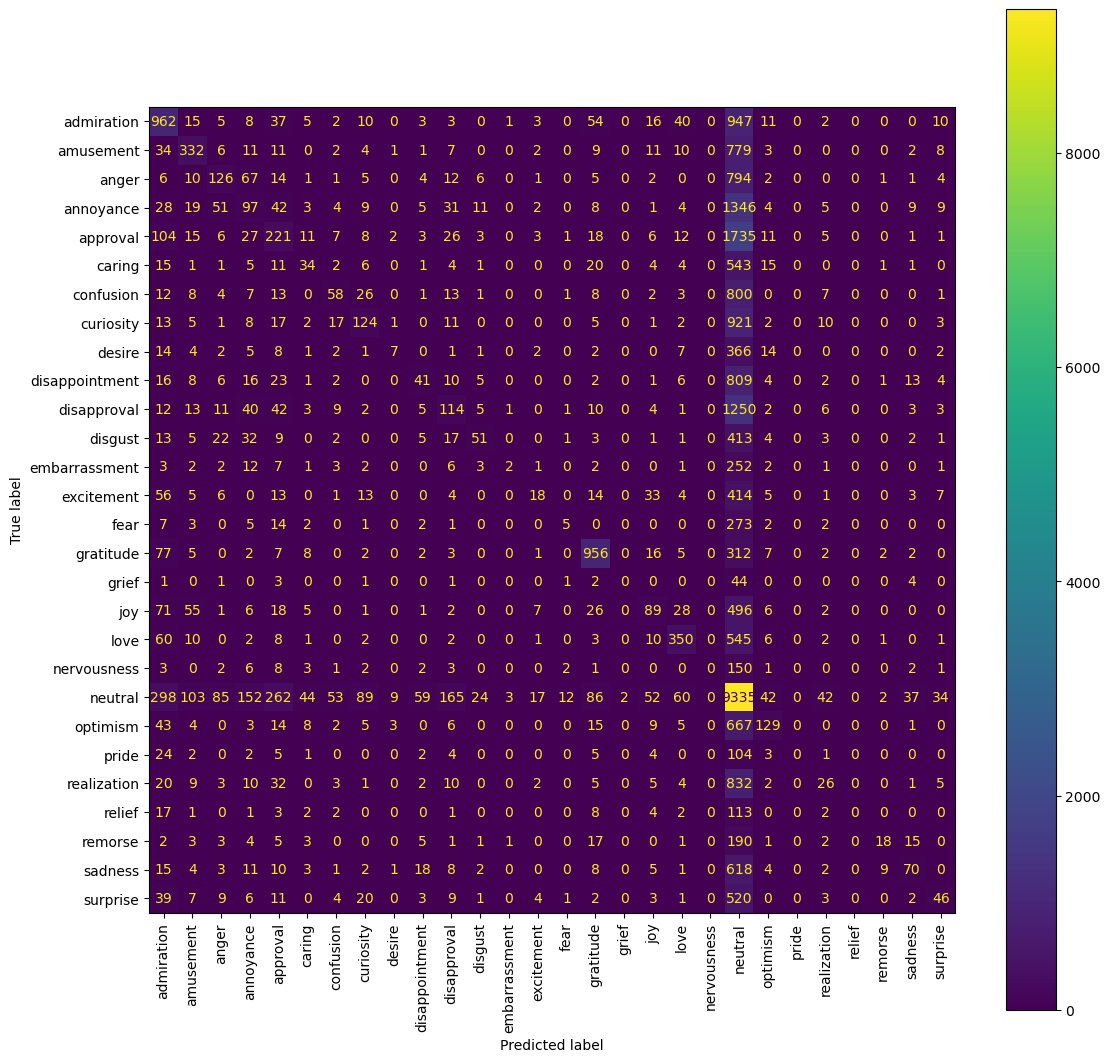

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Classification Task: Emotions
BaseMNBClassifier(x_train, y_train_emo, x_test, y_test_emo, 'Emotions', 'performance.txt')

Classification task:  Sentiments


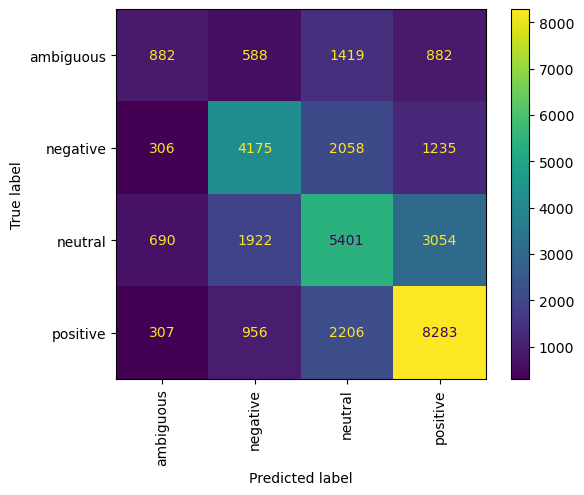

In [8]:
# Classification Task: Sentiments
BaseMNBClassifier(x_train, y_train_sen, x_test, y_test_sen, 'Sentiments', 'performance.txt')

### 2.3.2 Base Decision Tree (Base-DT) with default parameters

#### Function for training and testing with Base DT

In [9]:
def BaseDTClassifier(feature, label, x_test, y_test, classification_task, fileName):
    DT = tree.DecisionTreeClassifier()
    DT.fit(feature, label)
    y_pred = DT.predict(x_test)
    displayVisualConfusionMatrix(y_pred, y_test, classification_task)
    save_output('Base Decision Tree Model', classification_task, y_test, y_pred, fileName, DT, False)

#### Training and testing with Base DT

Classification task:  Emotions


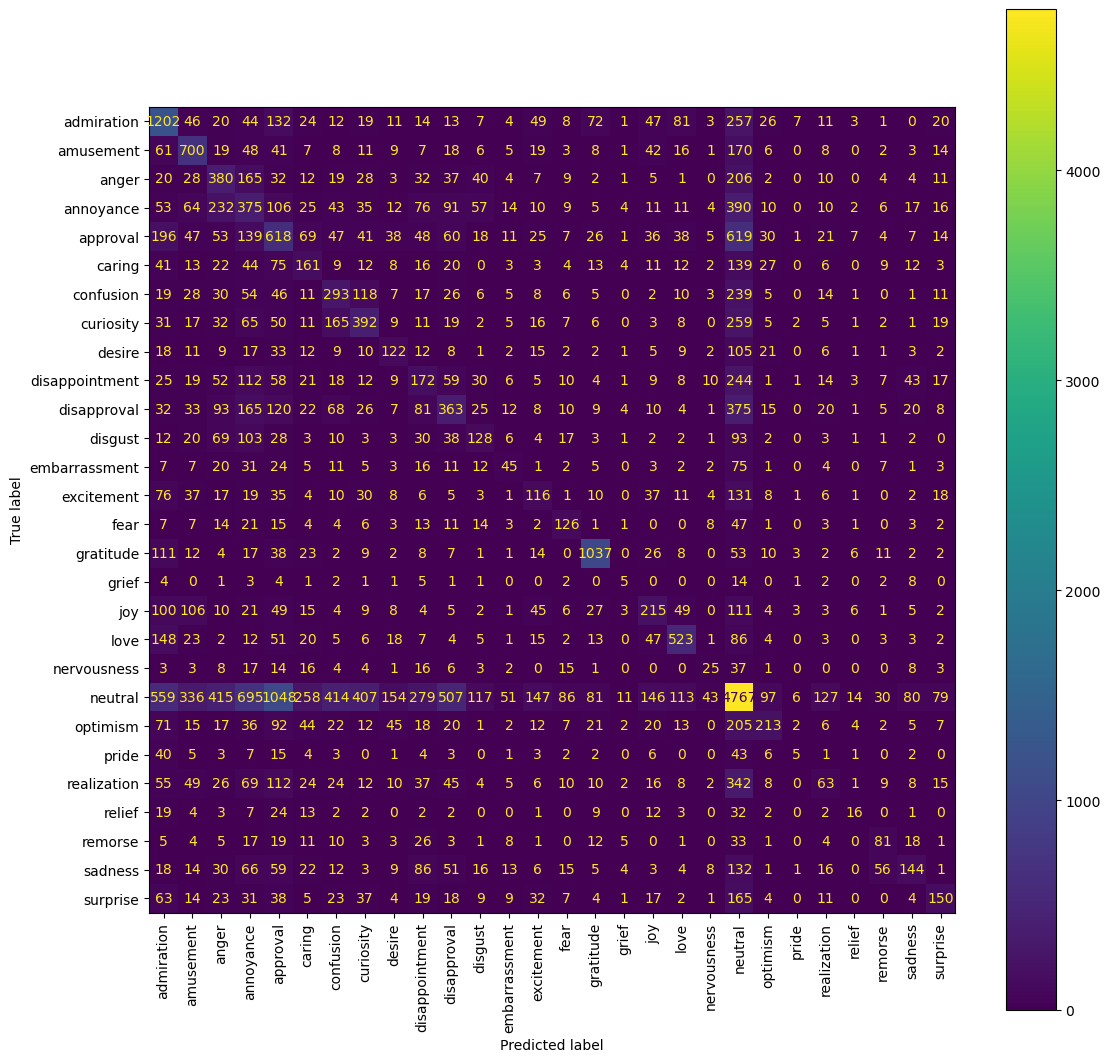

In [10]:
# Classification Task: Emotions
BaseDTClassifier(x_train, y_train_emo, x_test, y_test_emo, 'Emotions', 'performance.txt')

Classification task:  Sentiments


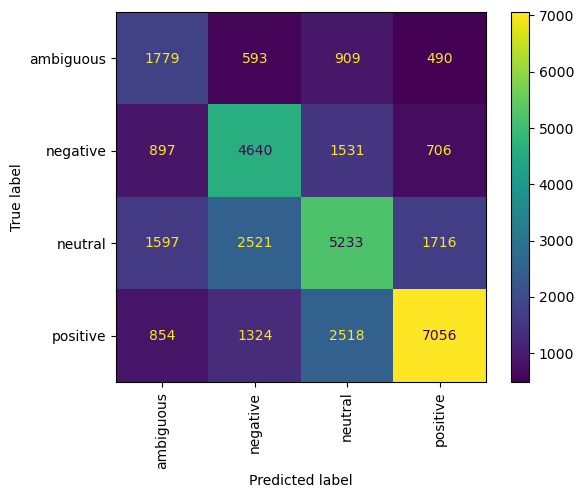

In [11]:
# Classification Task: Sentiments
BaseDTClassifier(x_train, y_train_sen, x_test, y_test_sen, 'Sentiments', 'performance.txt')

### 2.3.3 Base Multi-Layered Perceptron (Base-MLP) with default parameters

#### Function for training and testing with Base MLP

In [12]:
# Although we are asked to use default parameters and dataset is large, the MLP model takes too long to train. 
# Hence, we set a parameter of max iteration to 5.
def BaseMLPClassifier(feature, label, x_test, y_test, classification_task, fileName):
    MLP = MLPClassifier(max_iter=5)
    MLP.fit(feature, label)
    y_pred = MLP.predict(x_test)
    displayVisualConfusionMatrix(y_pred, y_test, classification_task)
    save_output('Base Multi-Layered Perceptron Model', classification_task, y_test, y_pred, fileName, MLP, False)

#### Training and testing with Base MLP

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Emotions


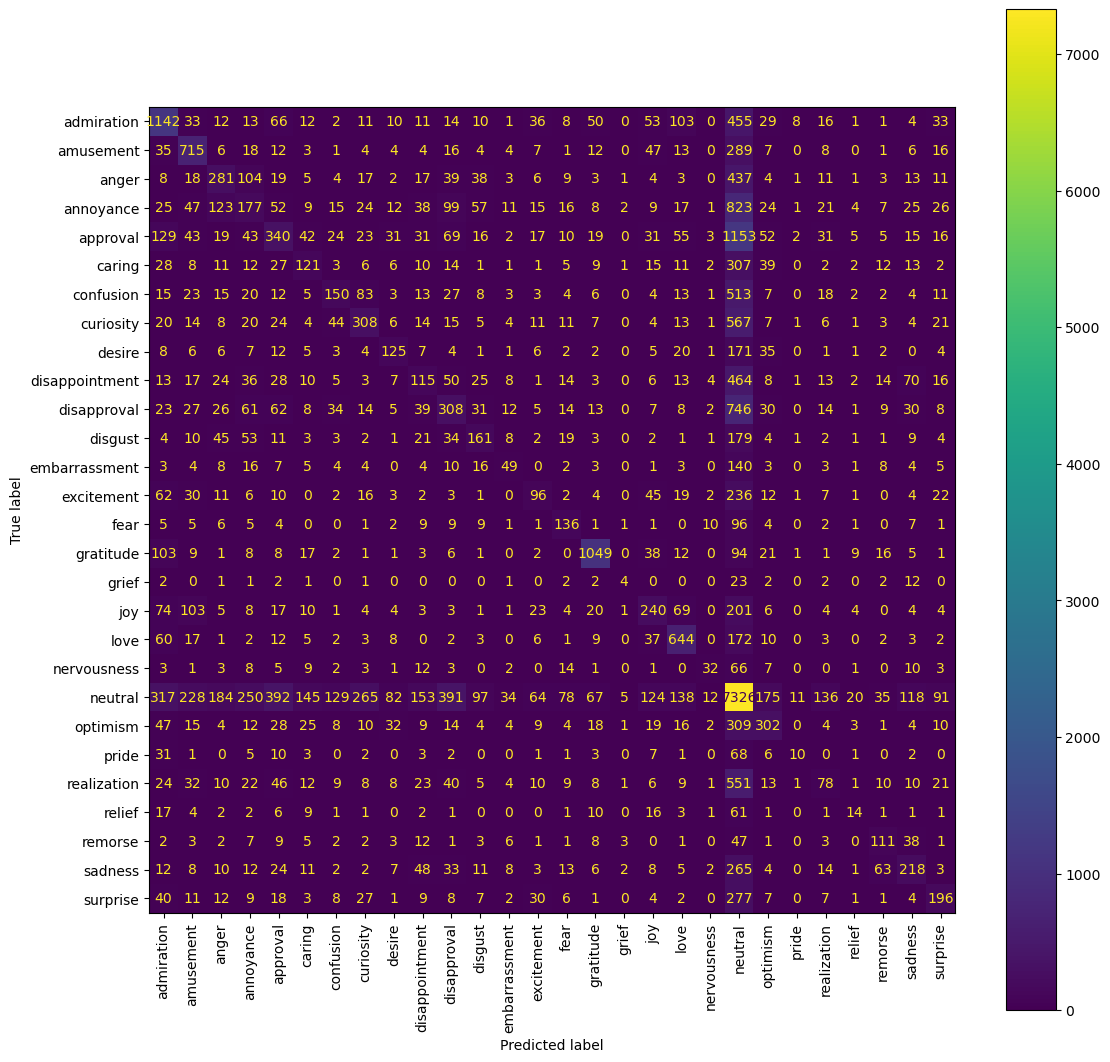

In [13]:
# Classification Task: Emotions
BaseMLPClassifier(x_train, y_train_emo, x_test, y_test_emo, 'Emotions', 'performance.txt')

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Sentiments


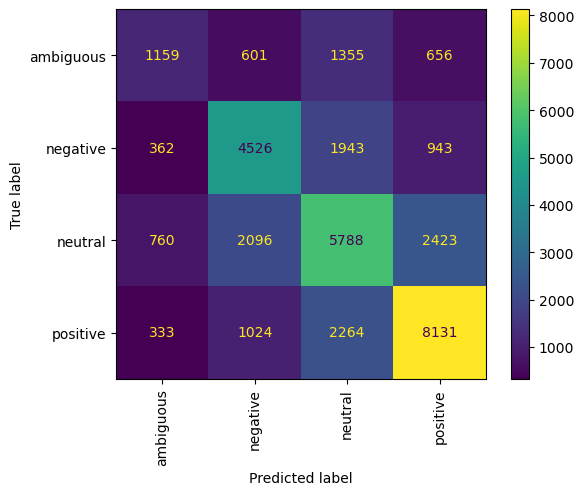

In [14]:
# Classification Task: Sentiments
BaseMLPClassifier(x_train, y_train_sen, x_test, y_test_sen, 'Sentiments', 'performance.txt')

#### Number of CPUs on system to use for the n_jobs parameter in GridSearchCV

In [15]:
# n_jobs = number of processors used to run jobs in parallel to speed up the process
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 12


### 2.3.4 Top Multinomial Naive Bayes (Top-MNB)

#### Function for training and testing with Top MNB

In [16]:
# Hyper parameters for MNB
MNBparams = {'alpha': (0, 0.5, 1.0, 1.5)}

def TopMNBClassifier(feature, label, x_test, y_test, classification_task, fileName):
    TopMNB = GridSearchCV(estimator=MultinomialNB(), param_grid=MNBparams, scoring='f1_weighted', n_jobs=n_cpu-1)
    TopMNB.fit(feature, label)
    y_pred = TopMNB.predict(x_test)
    displayVisualConfusionMatrix(y_pred, y_test, classification_task)
    save_output('Top Multinomial Naive Bayes Model', classification_task, y_test, y_pred, fileName, TopMNB, True, MNBparams)

#### Training and testing with Top MNB

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Classification task:  Emotions


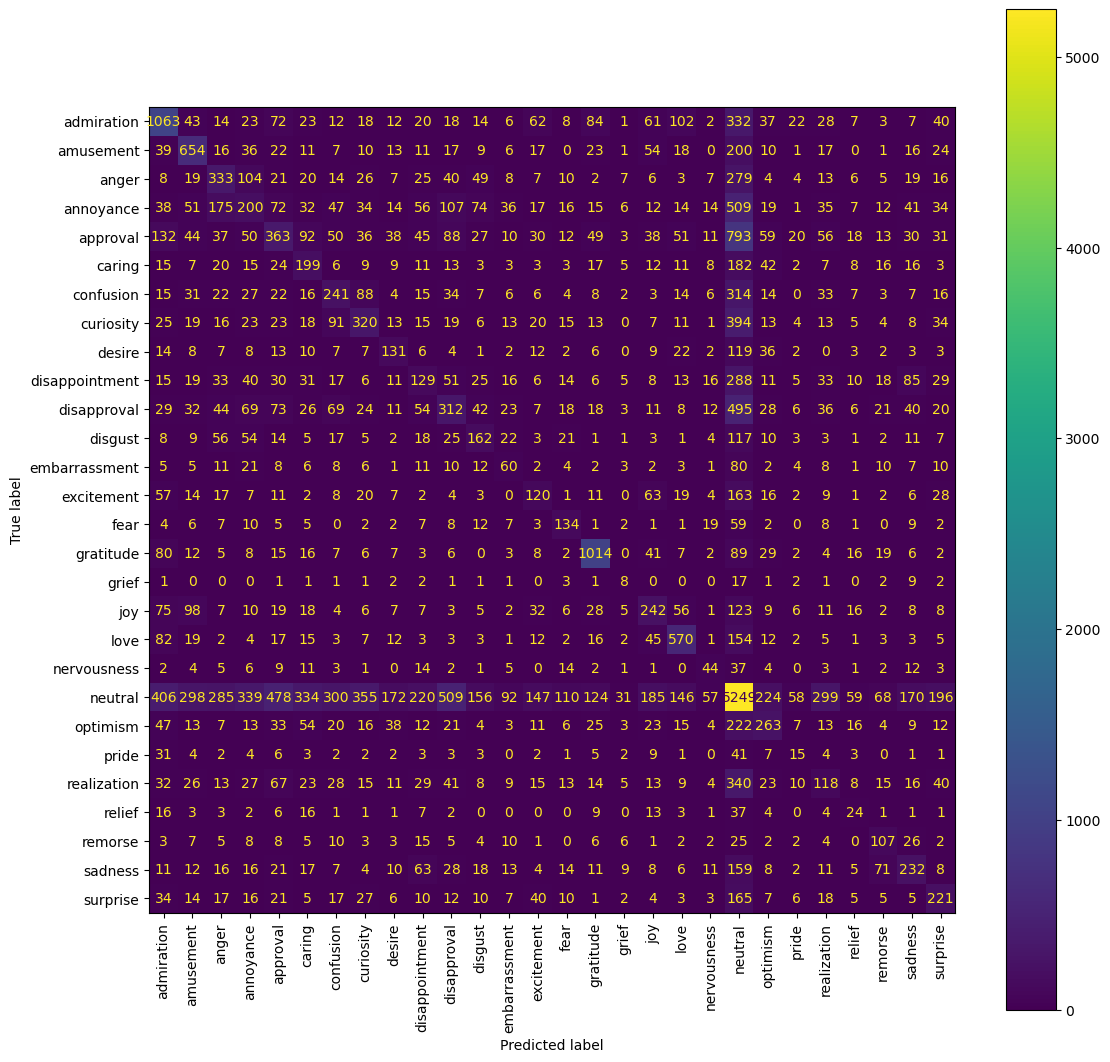

In [17]:
# Classification Task: Emotions
TopMNBClassifier(x_train, y_train_emo, x_test, y_test_emo, 'Emotions', 'performance.txt')

Classification task:  Sentiments


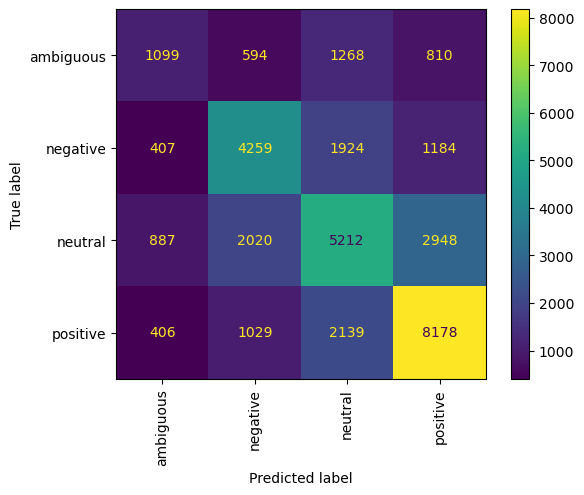

In [18]:
# Classification Task: Sentiments
TopMNBClassifier(x_train, y_train_sen, x_test, y_test_sen, 'Sentiments', 'performance.txt')

### 2.3.5 Top Decision Tree (Top-DT)

#### Function for training and testing with Top DT

In [19]:
# Hyper parameters for Top DT
DTparams = {'criterion' : ['gini', 'entropy'], "max_depth" : [5, 120] ,  'min_samples_split': [5, 15, 30]
}

# Function for training and testing with Top DT
def TopDTClassifier(feature, label, x_test, y_test, classification_task, fileName):
    TopDT = GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = DTparams, scoring='f1_weighted', n_jobs=n_cpu-1)
    TopDT.fit(feature, label)
    y_pred = TopDT.predict(x_test)
    displayVisualConfusionMatrix(y_pred, y_test, classification_task)
    save_output('Top Decision Tree Model', classification_task, y_test, y_pred, fileName, TopDT, True, DTparams)

#### Training and testing with Top DT

Classification task:  Emotions


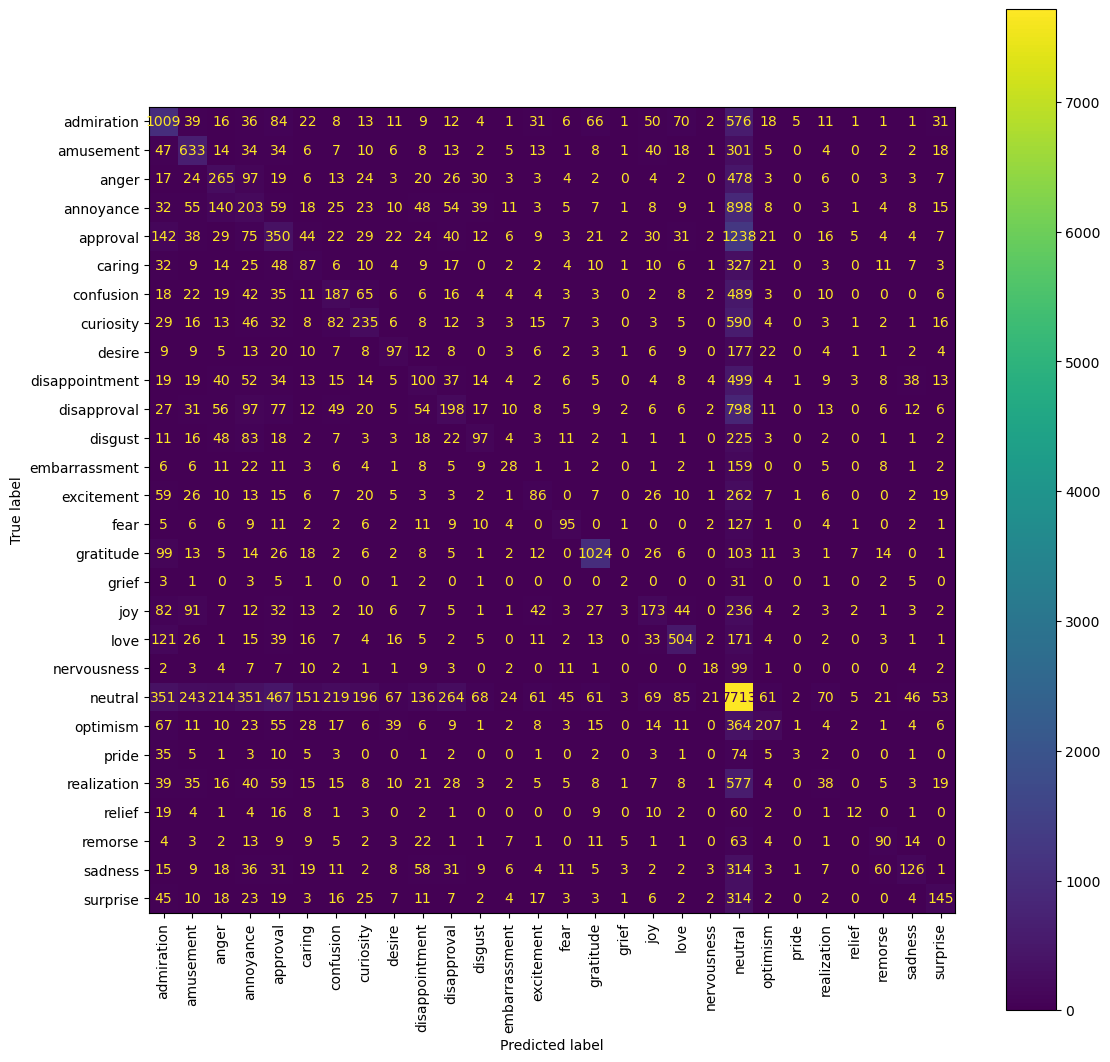

In [20]:
# Classification Task: Emotions
TopDTClassifier(x_train, y_train_emo, x_test, y_test_emo, 'Emotions', 'performance.txt')

Classification task:  Sentiments


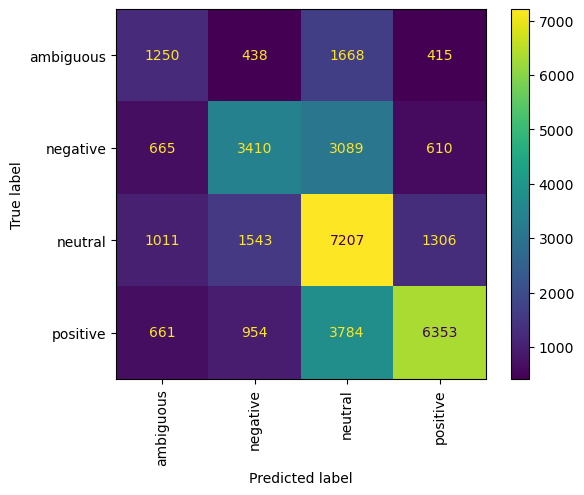

In [21]:
# Classification Task: Sentiments
TopDTClassifier(x_train, y_train_sen, x_test, y_test_sen, 'Sentiments', 'performance.txt')

### 2.3.6 Top Multi-Layered Perceptron (Top-MLP)

#### Function for training and testing with Top MLP

In [22]:
# Hyper parameters for Top-MLP
MLPparams = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
            'hidden_layer_sizes': ((120,), (30, 30)),
            'solver': ('adam', 'sgd'),
            'max_iter': [5]}

# Because the dataset is too large, the MLP model takes too long to train. Hence, we set a parameter of max
# iteration to 5.
def TopMLPClassifier(feature, label, x_test, y_test, classification_task, fileName):
    TopMLP = GridSearchCV(estimator=MLPClassifier(), param_grid=MLPparams, scoring='f1_weighted', n_jobs=n_cpu-1)
    TopMLP.fit(feature, label)
    y_pred = TopMLP.predict(x_test)
    displayVisualConfusionMatrix(y_pred, y_test, classification_task)
    save_output('Top Multi-Layered Perceptron Model', classification_task, y_test, y_pred, fileName, TopMLP, True, MLPparams)

#### Training and testing with Top MLP

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Emotions


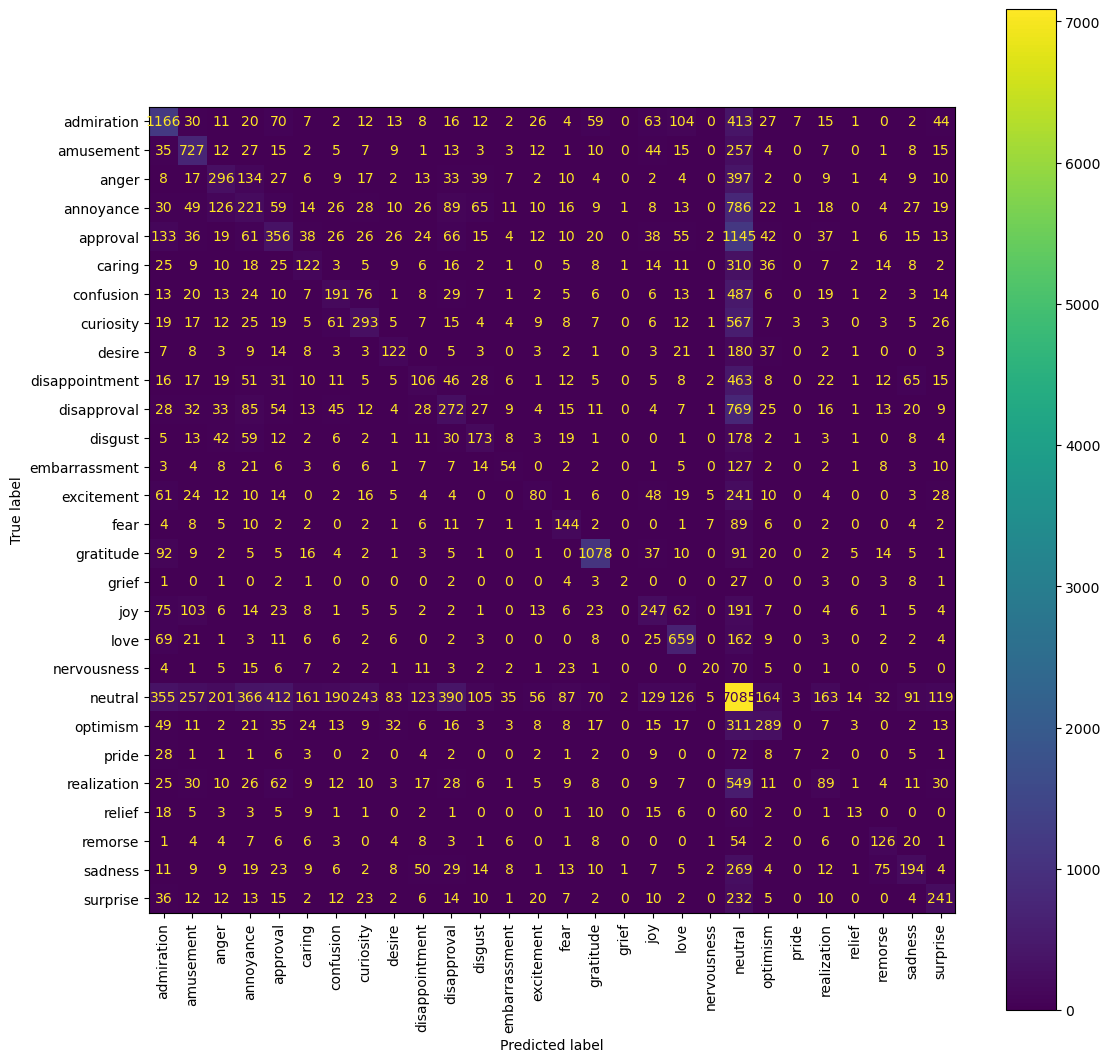

In [23]:
# Classification Task: Emotions
TopMLPClassifier(x_train, y_train_emo, x_test, y_test_emo, 'Emotions', 'performance.txt')

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Sentiments


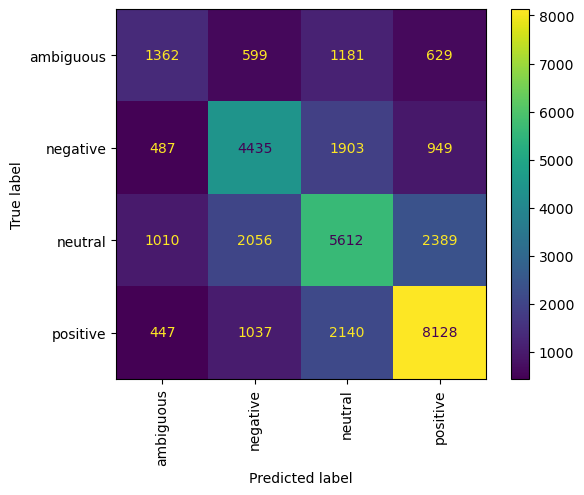

In [24]:
# Classification Task: Sentiments
TopMLPClassifier(x_train, y_train_sen, x_test, y_test_sen, 'Sentiments', 'performance.txt')

## 2.5 Exploration with stop words removal

### Removing stop words with parameter in CountVectorizer

In [25]:
stopWordsVectorizer = CountVectorizer(stop_words='english')
# Creates a document-term matrix
postsWithoutStopWords = stopWordsVectorizer.fit_transform(posts)

### Splitting dataset without stop words into training (80%) and testing (20%) 

In [26]:
# Splitting training and testing dataset for posts and emotions without stop words
x_train_stop, x_test_stop, y_train_emo_stop, y_test_emo_stop, y_train_sen_stop, y_test_sen_stop = train_test_split(postsWithoutStopWords, emotions, sentiments, test_size=0.2, random_state=0)

### Training and testing new dataset with all models from 2.3

#### Model: Base MNB

Classification task:  Emotions


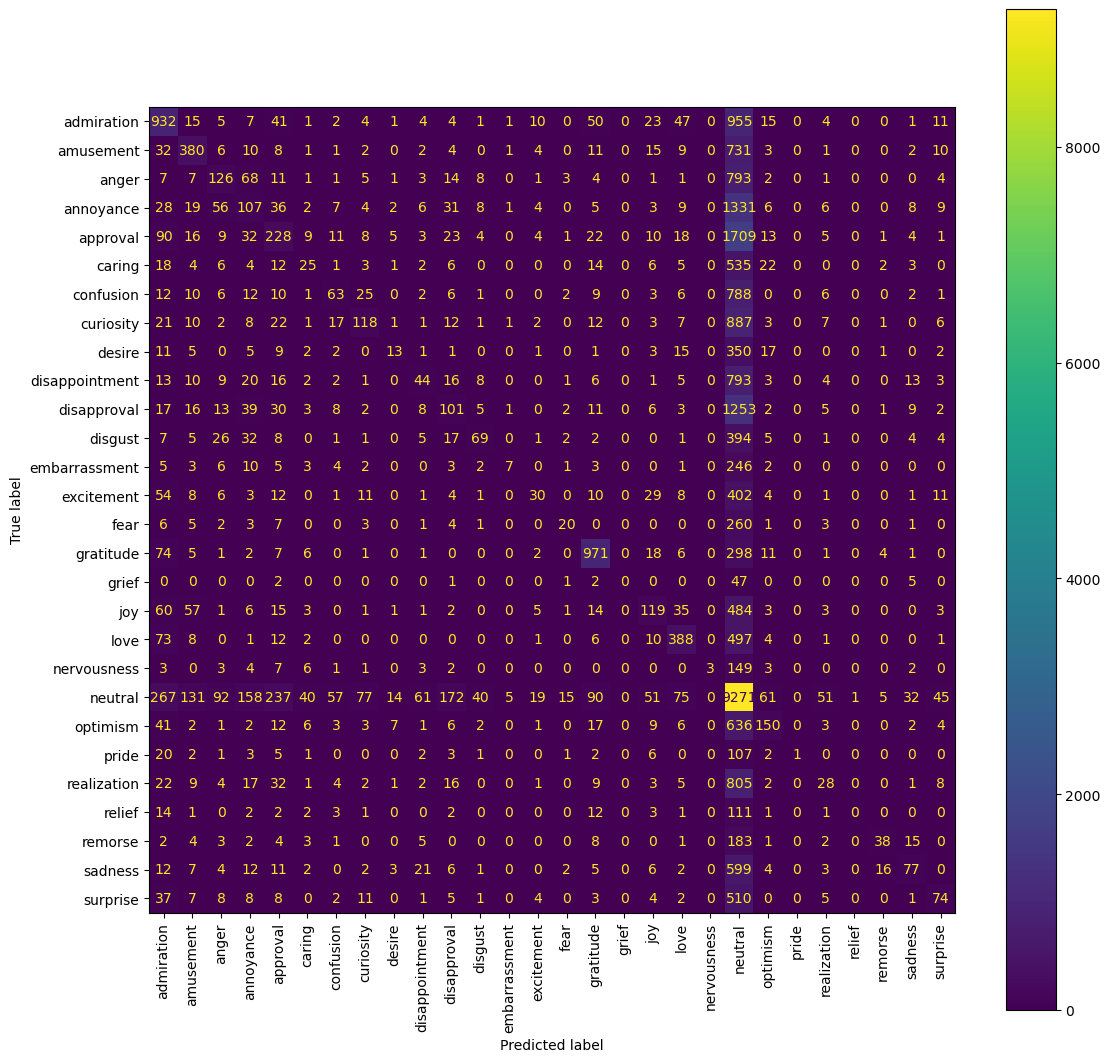

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Classification Task: Emotions
BaseMNBClassifier(x_train_stop, y_train_emo_stop, x_test_stop, y_test_emo_stop, 'Emotions', 'experiment.txt')

Classification task:  Sentiments


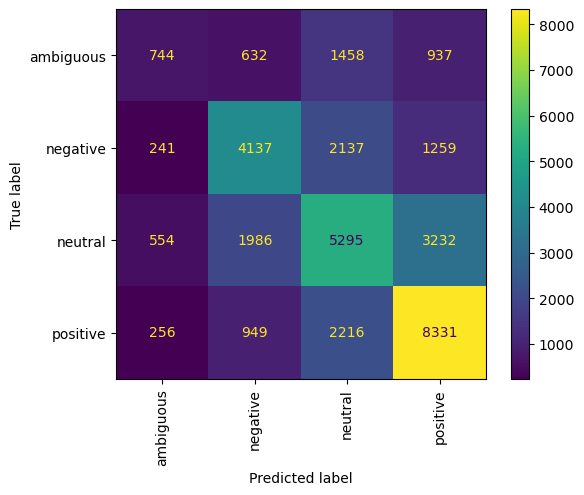

In [28]:
# Classification Task: Sentiments
BaseMNBClassifier(x_train_stop, y_train_sen_stop, x_test_stop, y_test_sen_stop, 'Sentiments', 'experiment.txt')

#### Model: Base DT

Classification task:  Emotions


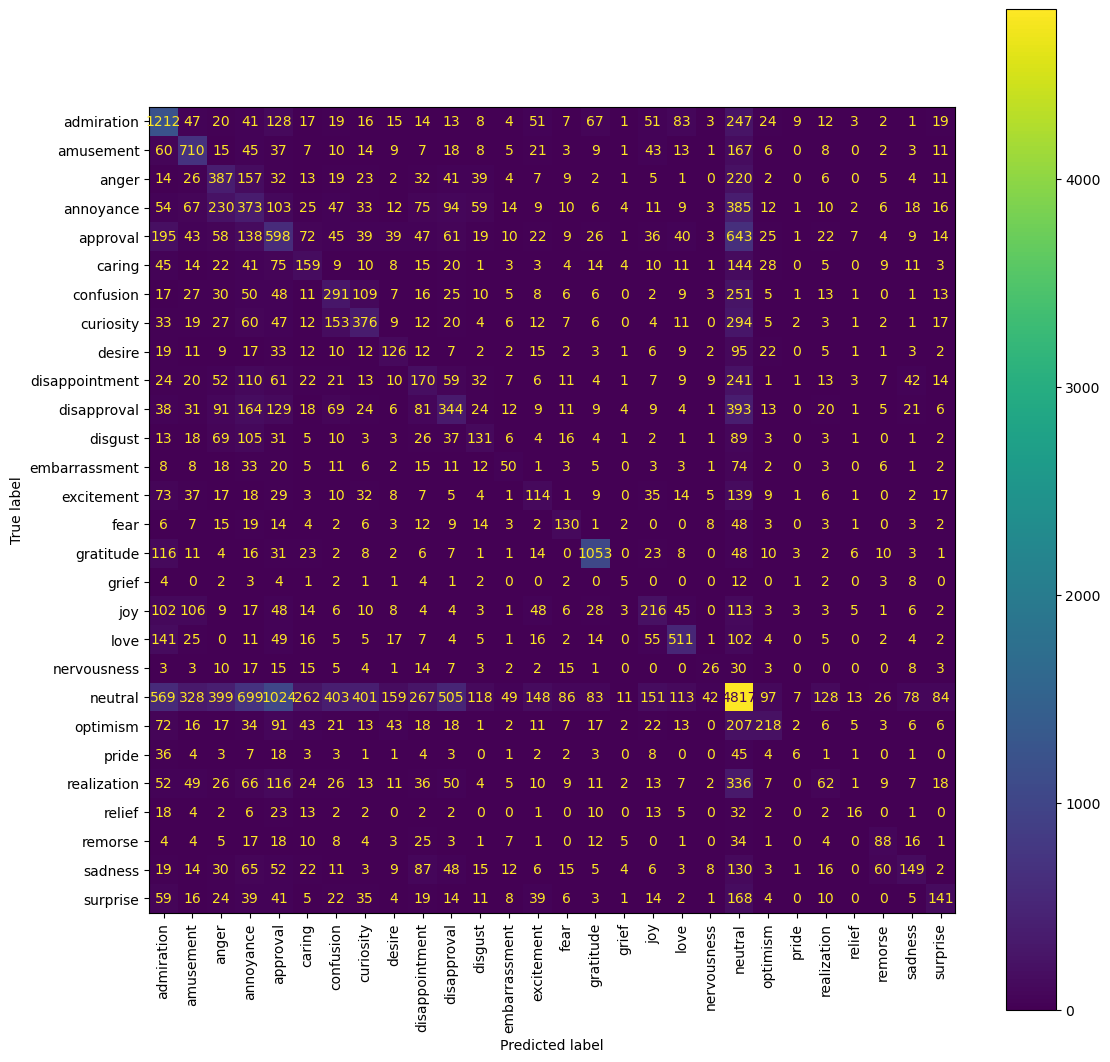

In [29]:
# Classification Task: Emotions
BaseDTClassifier(x_train_stop, y_train_emo_stop, x_test_stop, y_test_emo_stop, 'Emotions', 'experiment.txt')

Classification task:  Sentiments


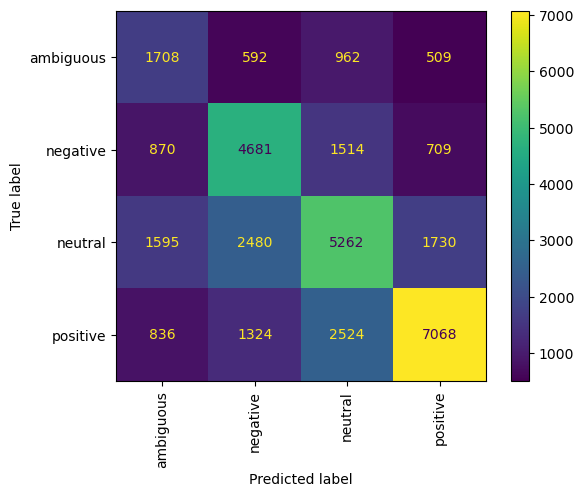

In [30]:
# Classification Task: Sentiments
BaseDTClassifier(x_train_stop,  y_train_sen_stop, x_test_stop, y_test_sen_stop, 'Sentiments', 'experiment.txt')

#### Model: Base MLP

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Emotions


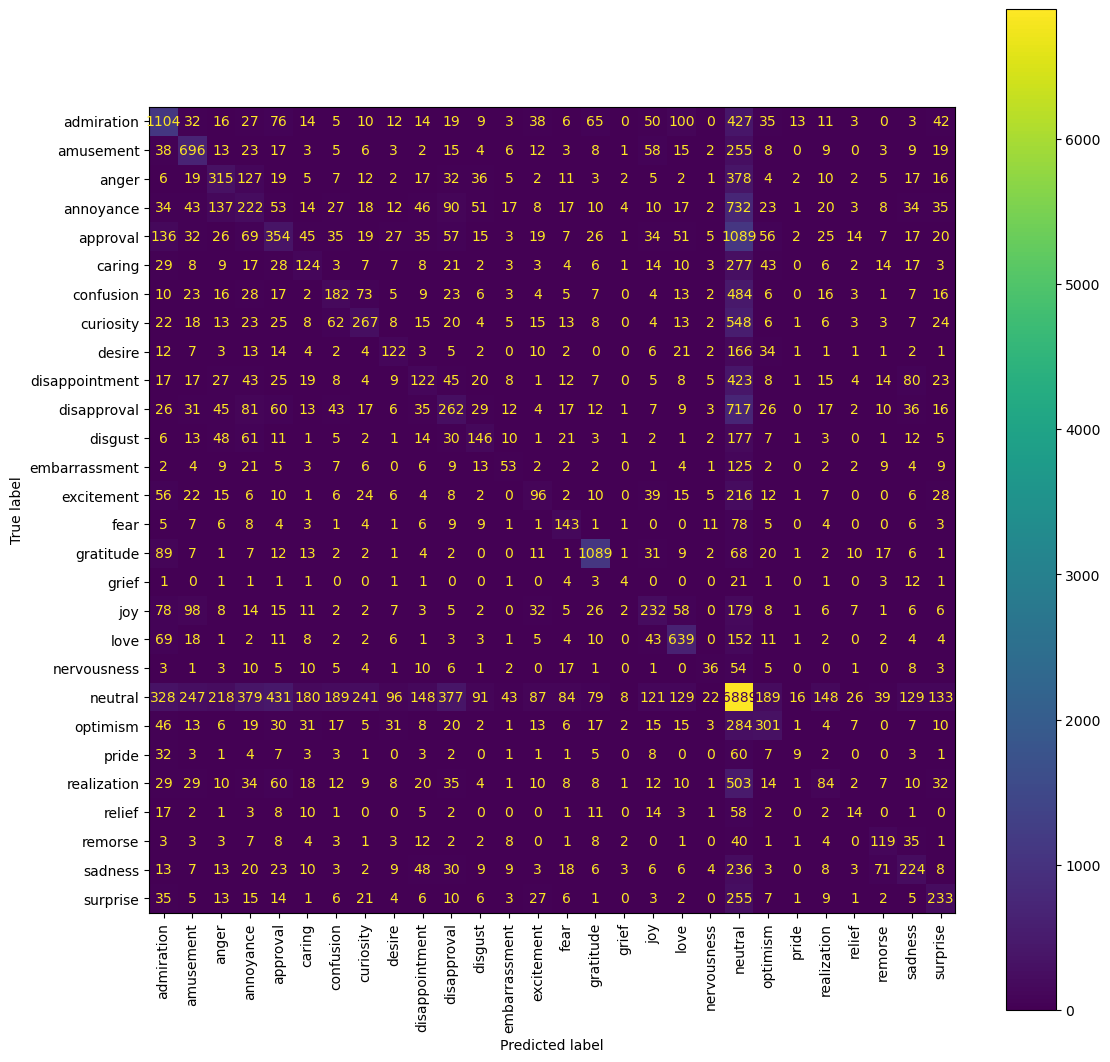

In [31]:
# Classification Task: Emotions
BaseMLPClassifier(x_train_stop, y_train_emo_stop, x_test_stop, y_test_emo_stop, 'Emotions', 'experiment.txt')

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Sentiments


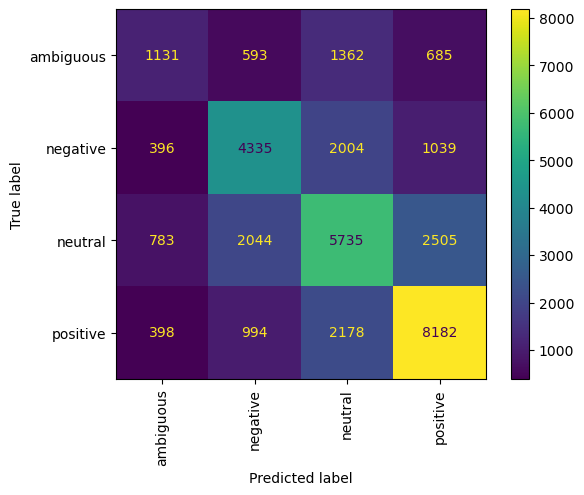

In [32]:
# Classification Task: Sentiments
BaseMLPClassifier(x_train_stop, y_train_sen_stop, x_test_stop, y_test_sen_stop, 'Sentiments', 'experiment.txt')

#### Model: Top MNB

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Classification task:  Emotions


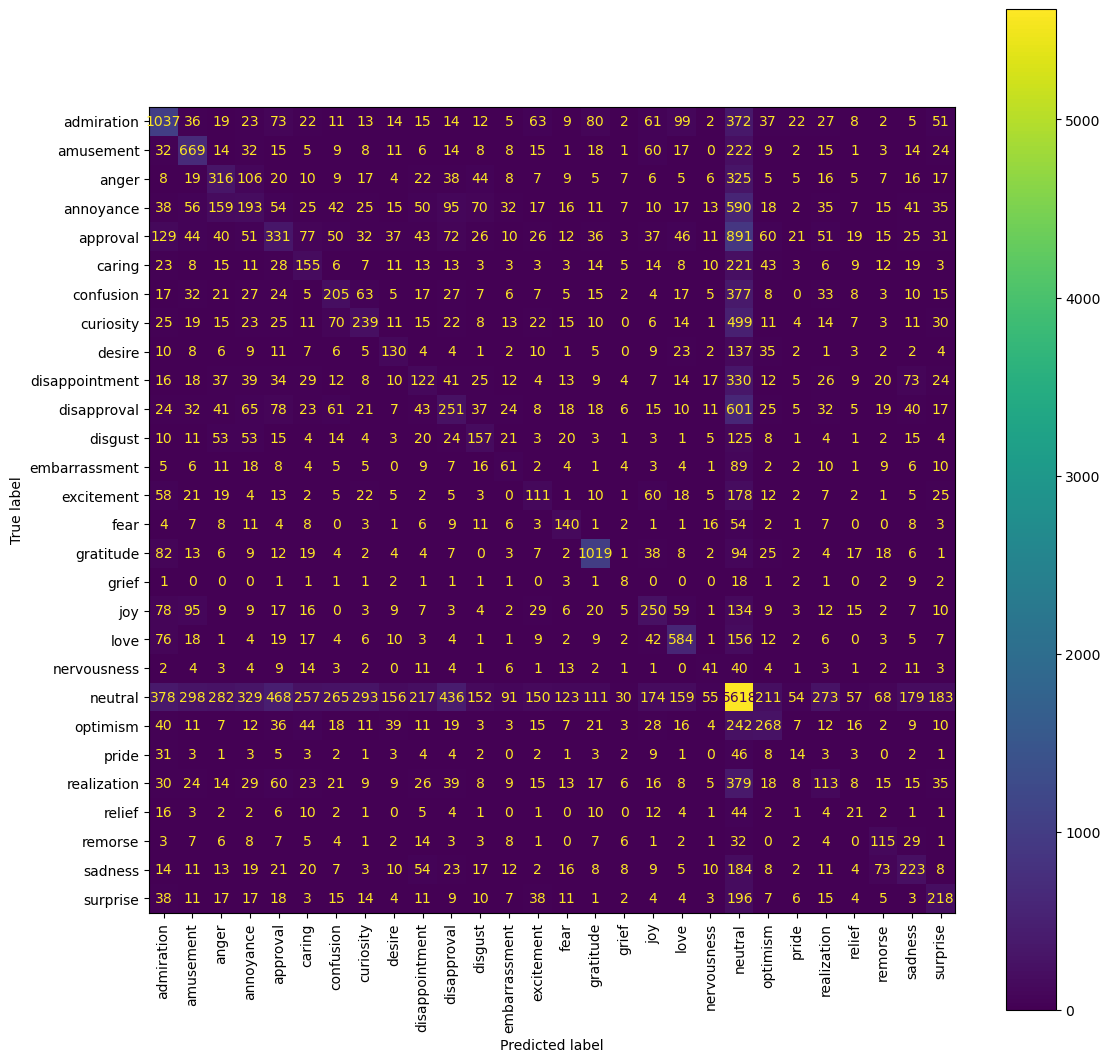

In [33]:
# Classification Task: Emotions
TopMNBClassifier(x_train_stop, y_train_emo_stop, x_test_stop, y_test_emo_stop, 'Emotions', 'experiment.txt')

Classification task:  Sentiments


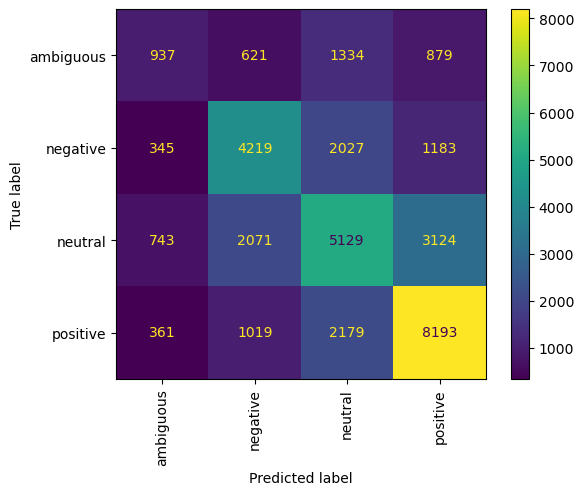

In [34]:
# Classification Task: Sentiments
TopMNBClassifier(x_train_stop, y_train_sen_stop, x_test_stop, y_test_sen_stop, 'Sentiments', 'experiment.txt')

#### Model: Top DT

Classification task:  Emotions


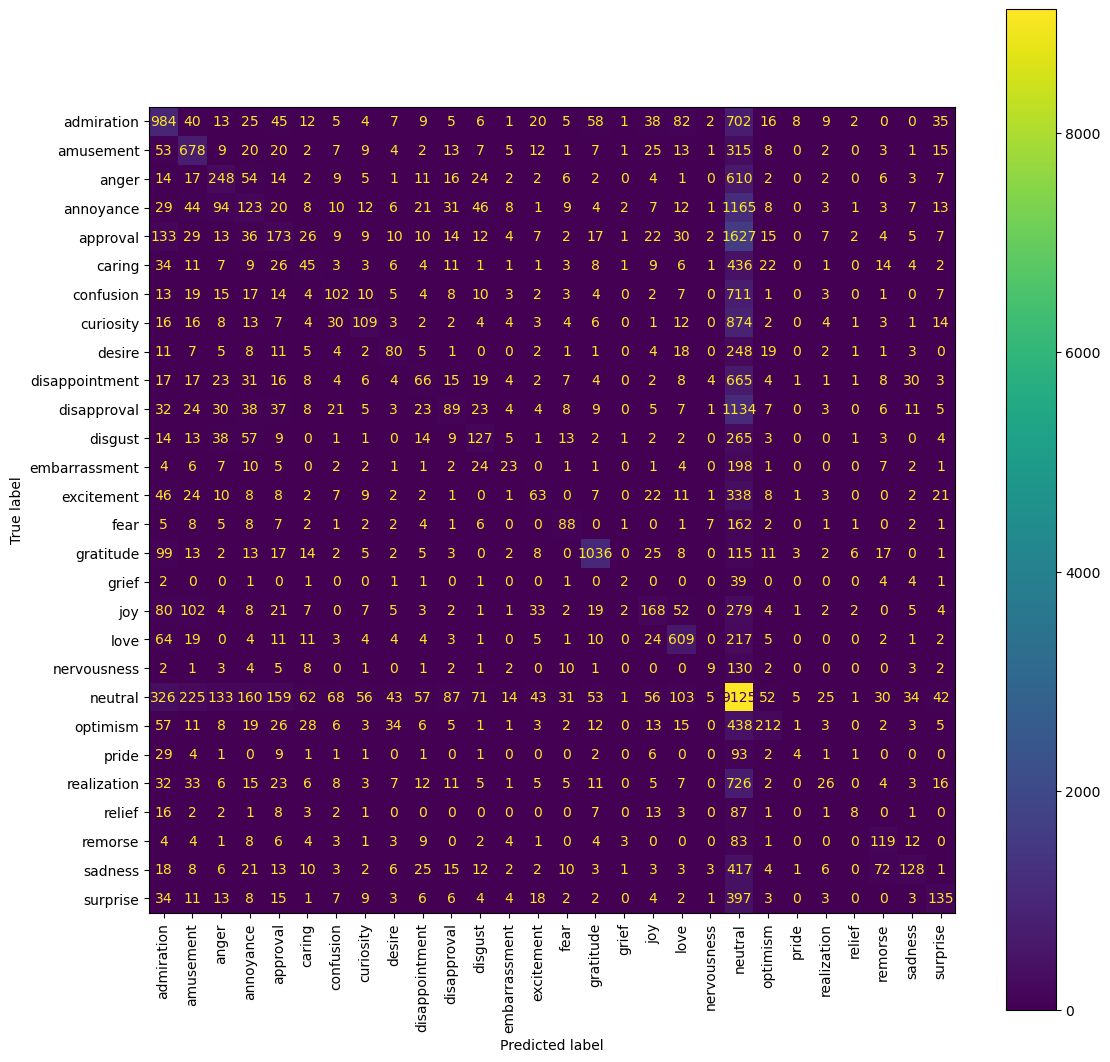

In [35]:
# Classification Task: Emotions
TopDTClassifier(x_train_stop, y_train_emo_stop, x_test_stop, y_test_emo_stop, 'Emotions', 'experiment.txt')

Classification task:  Sentiments


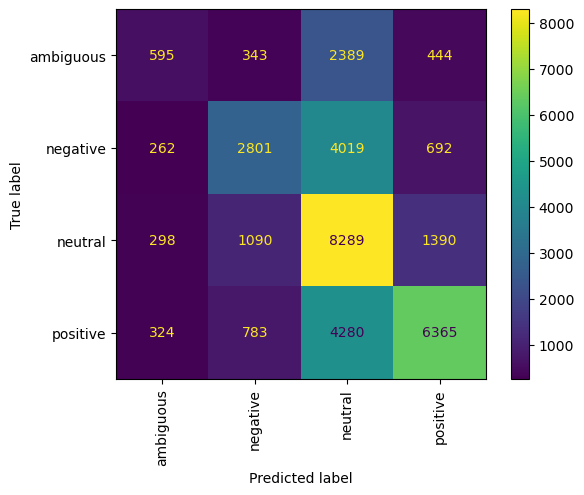

In [36]:
# Classification Task: Sentiments
TopDTClassifier(x_train_stop, y_train_sen_stop, x_test_stop, y_test_sen_stop, 'Sentiments', 'experiment.txt')

#### Model: Top MLP

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Emotions


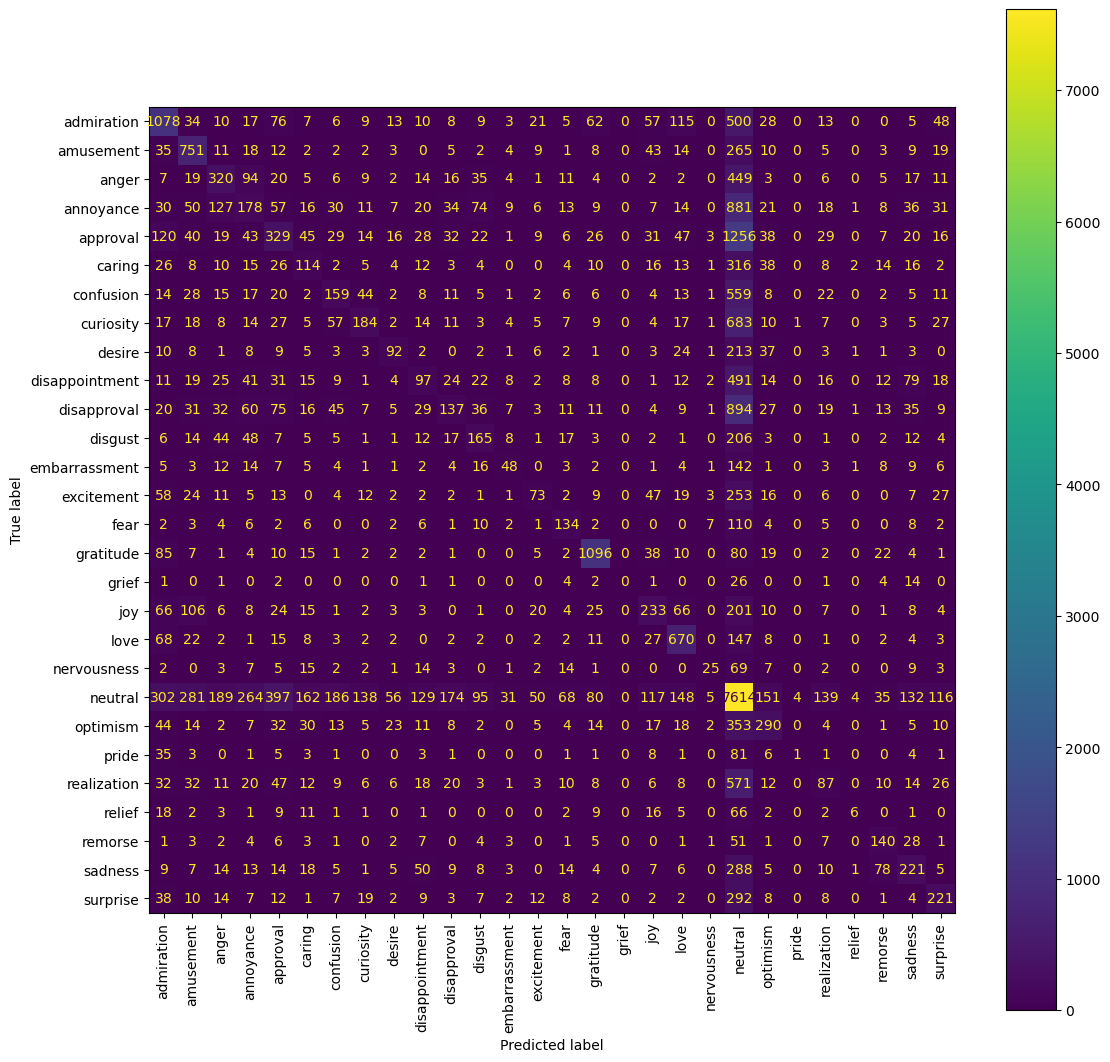

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Classification Task: Emotions
TopMLPClassifier(x_train_stop, y_train_emo_stop, x_test_stop, y_test_emo_stop, 'Emotions', 'experiment.txt')

C:\Users\Duong\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification task:  Sentiments


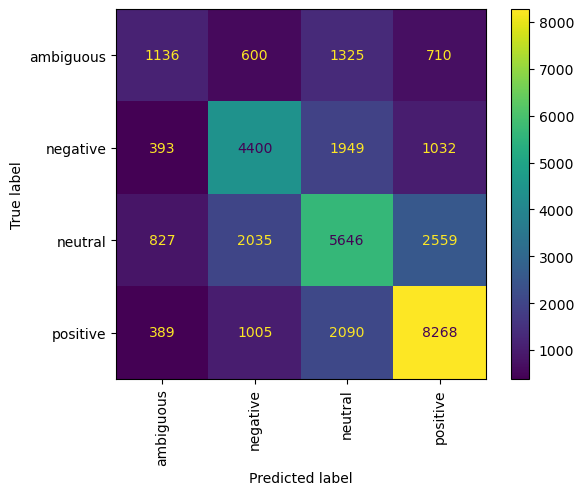

In [38]:
# Classification Task: Sentiments
TopMLPClassifier(x_train_stop, y_train_sen_stop, x_test_stop, y_test_sen_stop, 'Sentiments', 'experiment.txt')